<a id=top-page></a>
# `pykitPIV` demo: Generate synthetic images

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
    <li><a href="#generate-velocity-field">Generate random velocity field to advect the particles</a></li>
    <li><a href="#add-movement">Add movement to particles</a></li>
        <ul>
        <li><a href="#add-movement-update-time-sep">Update time separation</a></li>
        <li><a href="#add-movement-visualize">Visualize the PIV image pair</a></li>
        </ul>
    <li><a href="#save">Save the dataset</a></li>
    <li><a href="#upload">Upload the saved datasets</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

In [3]:
n_images = 1

In [4]:
image_size = (128,256)

In [5]:
size_buffer = 10

In [6]:
figsize = (6,3)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [7]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(3,3.1),
                     distances=(1,2),
                     densities=(0.05,0.1),
                     signal_to_noise=(5,20),
                     diameter_std=0.2,
                     seeding_mode='random', 
                     random_seed=100)

In [8]:
image = Image(random_seed=100)

In [9]:
image.add_particles(particles)

Particles added to the image.


In [10]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

Reflected light added to images I1.


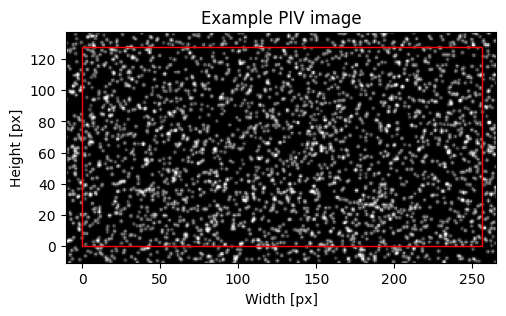

In [11]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image',
           cmap='Greys_r',
           figsize=figsize, 
           filename='example-image.png');

<a id=generate-velocity-field></a>
***

## Generate random velocity field to advect the particles

[Go to the top](#top-page)

In [12]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      flow_mode='random',
                      gaussian_filters=(10,11),
                      n_gaussian_filter_iter=20,
                      sin_period=(30,300),
                      displacement=(0,10),
                      random_seed=100)

In [13]:
image.add_flowfield(flowfield)

Velocity field added to the image.


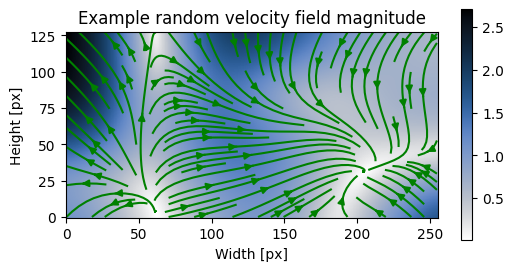

In [14]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_streamplot=True,
                                    streamplot_density=1,
                                    streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize,
                                    filename='example-random-velocity-field-magnitude-streamplot.png');

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [15]:
motion = Motion(particles, 
                flowfield, 
                time_separation=1)

In [16]:
motion.forward_euler(n_steps=10)

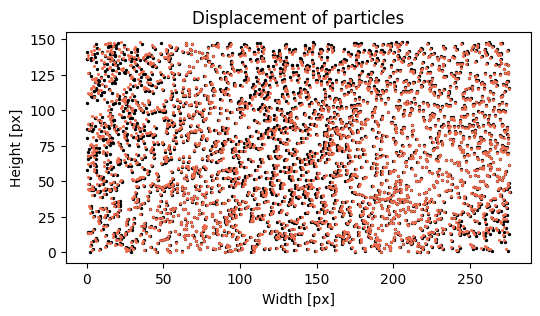

In [17]:
motion.plot_particle_motion(0,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename='particle-displacement-01.png');

<a id=add-movement-update-time-sep></a>

#### Update time separation:

[Go to the top](#top-page)

In [18]:
motion.time_separation = 1

In [19]:
motion.runge_kutta_4th(n_steps=10)

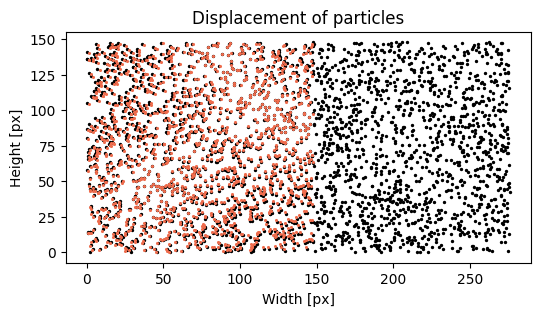

In [20]:
motion.plot_particle_motion(0,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize,
                            filename='particle-displacement-05.png');

In [21]:
motion.particle_coordinates_I2[0][0].shape

(1593,)

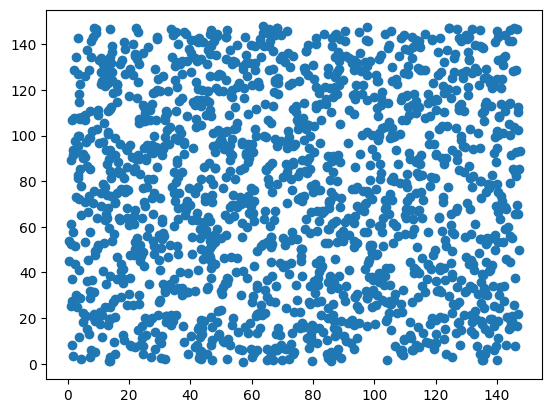

In [22]:
plt.scatter(motion.particle_coordinates_I2[0][0], motion.particle_coordinates_I2[0][1])

***